#  Baseball statistics
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

Throughout the baseball history, the management guys of ball-clubs have tried to evaluate baseball players, and they created some statistics such as 'Average (타율)', 'Runs Batted In (RBI, 타점)', 'Earned Run Average (ERA, 평균자책점)' and so on. But these have some limitations in measuring the "real value" of the players, so some complicated mathematical stuffs came in and a new approach called 'SABERMETRICS' was introduced.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df

,Name,Team,W,L,ERA,G,GS,CG,ShO,SV,...,R,ER,HR,BB,IBB,HBP,WP,BK,SO,playerid
0,Hyun-Jin Ryu,Dodgers,14,5,2.32,29,29,1,1,0,...,53,47,17,24,2,4,0,0,163,14444
1,Jacob deGrom,Mets,11,8,2.43,32,32,0,0,0,...,59,55,19,44,1,7,2,0,255,10954
2,Gerrit Cole,Astros,20,5,2.50,33,33,0,0,0,...,66,59,29,48,0,3,4,3,326,13125
3,Justin Verlander,Astros,21,6,2.58,34,34,2,1,0,...,66,64,36,42,0,6,4,0,300,8700
4,Mike Soroka,Braves,13,4,2.68,29,29,0,0,0,...,56,52,14,41,1,7,3,0,142,18383
5,Jack Flaherty,Cardinals,11,8,2.75,33,33,0,0,0,...,62,60,25,55,2,7,6,0,231,17479
6,Sonny Gray,Reds,11,8,2.87,31,31,0,0,0,...,59,56,17,68,1,7,7,1,205,12768
7,Max Scherzer,Nationals,11,7,2.92,27,27,0,0,0,...,59,56,18,33,2,7,0,0,243,3137
8,Zack Greinke,- - -,18,5,2.93,33,33,0,0,0,...,73,68,21,30,2,4,2,1,187,1943
9,Clayton Kershaw,Dodgers,16,5,3.05,28,28,0,0,0,...,63,60,28,41,0,2,7,1,188,2036


One of the most famous stats in sabermetrics is the 'Fielding Independent Pitching (FIP, 수비무관 평균자책점)'. In a ball game, earned runs are not only decided by the pitching skills, but also decided by a lot of other factors such as the size of the field and the fielding skills of position players. Hence, sabermetricians who deal with sabermetrics pay attention to the position-player-independent factors. For example, the strike-outs or the base-on-balls are independent of the performances of position players, but only a pitcher is involved. So the FIP can be represented by using these independent factors as follows.

<br>
$$
FIP = \frac{13HR+3(BB-IBB+HBP)-2SO}{IP} +3.20
$$

<br>
Here, IP, BB, IBB, HBP, HR and SO denote Inning Pitched, Base on Balls, Intentional Base on Balls, Hit By Pitch, HomeRuns, and StrikeOuts, respectively. 

Calculate the FIP of the pitchers using the above formula, and append it as a new column on your dataframe. Display the results on a plot.

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


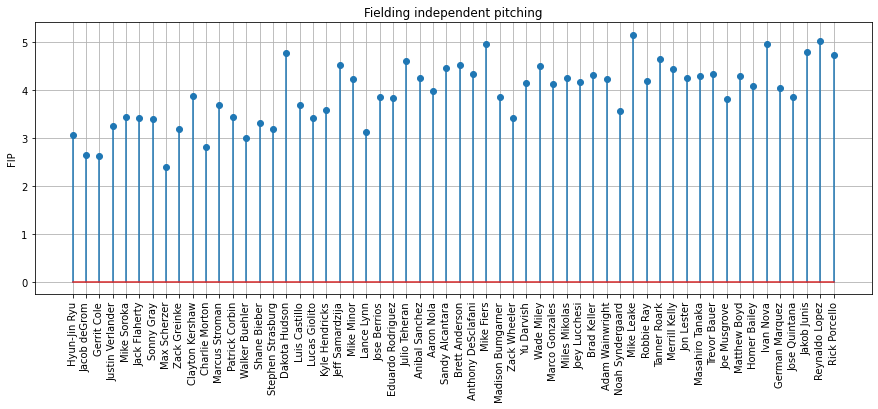

In [2]:
data = np.array(df)
df['FIP'] = (13 * df['HR'] + 3*(df['BB']-df['IBB']+df['HBP']) -2*df['SO'])/df['IP'] + 3.20

plt.figure(figsize=(15,5))
plt.stem(df['Name'], df['FIP'])
plt.xticks(rotation='vertical')
plt.ylabel('FIP')
plt.title('Fielding independent pitching')
plt.grid()
plt.show()


<br>

The MLB is divided into two leagues; the National League(NL) and the American League(AL). By running below cell, you can get the lists made of the NL and the AL teams.

In [3]:
AL = ['Yankees', 'Rays', 'Red Sox', 'Blue Jays', 'Orioles', 'Twins', 'Indians', 'White Sox', 'Royals', 'Tigers', \
      'Astros', 'Athletics', 'Rangers', 'Angels', 'Mariners']
NL = ['Braves', 'Nationals', 'Mets', 'Phillies', 'Marlins', 'Cardinals', 'Brewers', 'Cubs', 'Reds', 'Pirates', 'Dodgers', \
      'Diamondbacks', 'Giants', 'Padres', 'Rockies']

In [4]:
# your code here

league = np.zeros(df.shape[0])
for i in range(df.shape[0]):
  if len(set(AL) & set([df['Team'][i]])):
    league[i] = 1
  elif len(set(NL) & set([df['Team'][i]])):
    league[i] = 2
  else:
    league[i] = 0
df['league'] = league
AL_index = np.where(df['league'] == 1)
NL_index = np.where(df['league'] == 2)
AL_name = df['Name'].values[AL_index]
NL_name = df['Name'].values[NL_index]
AL_top5 = AL_name[np.argsort(df['FIP'].values[AL_index])[:5]]
NL_top5 = NL_name[np.argsort(df['FIP'].values[NL_index])[:5]]

print(f'AL top 5 pitchers for FIP: {AL_top5}')
print(f'NL top 5 pitchers for FIP: {NL_top5}')

AL top 5 pitchers for FIP: ['Gerrit Cole' 'Charlie Morton' 'Lance Lynn' 'Justin Verlander'
 'Shane Bieber']
NL top 5 pitchers for FIP: ['Max Scherzer' 'Jacob deGrom' 'Walker Buehler' 'Hyun-Jin Ryu'
 'Stephen Strasburg']


Every year, the Cy Young Award is given to the most outstanding pitcher in each league of MLB. The award was introduced in 1956 by Commissioner Ford Frick and approved by the Baseball Writers Association of America. The award is named in honor of Hall of Fame pitcher Cy Young who died a year earlier in 1955. Based on the given dataset, we would like to anticipate who the recipient will be. To predict winners, we can use the following two predictors. 

<br>

_Tom Tango Cy Young Award predictor:_

<br>

$$
\text{Cy Young Points (Tom Tango)} = \frac{1}{2}IP-ER + \frac{1}{10}SO + W
$$

<br>

_ESPN Cy Young Award predictot:_

<br>

$$
\text{Cy Young Points (ESPN)} = \frac{5}{9}IP - ER +\frac{SO}{12}+2.5SV + ShO + 6W-2L
$$

<br>

By using the above two models, predict the future Cy Young Award recipients  from each league. 


By Tom Tango`s model, Gerrit Cole in AL and Jacob deGrom in NL will win the Cy Young Award
By ESPN`s model, Justin Verlander in AL and Stephen Strasburg in NL will win the Cy Young Award


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


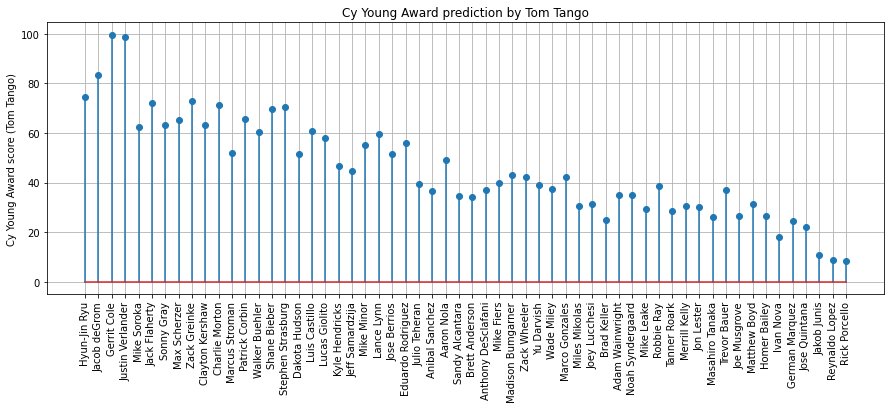

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


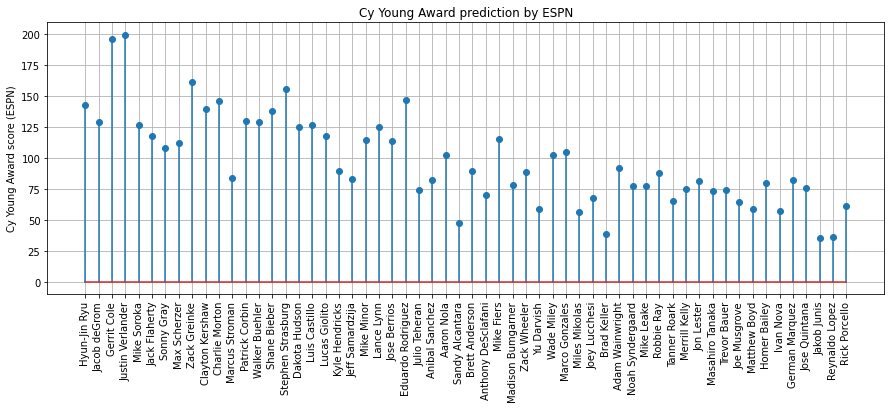

In [5]:
CYP_TT = (df['IP']/2-df['ER']) + df['SO']/10 + df['W']
CYP_ESPN = 5*df['IP']/9 - df['ER'] + df['SO']/12 + 2.5*df['SV'] + df['ShO'] + 6*df['W'] - 2*df['L']
df['CYP_TT'] = CYP_TT
df['CYP_ESPN'] = CYP_ESPN 
AL_TT = AL_name[np.argmax(df['CYP_TT'].values[AL_index])]
NL_TT = NL_name[np.argmax(df['CYP_TT'].values[NL_index])]
AL_ESPN = AL_name[np.argmax(df['CYP_ESPN'].values[AL_index])]
NL_ESPN = NL_name[np.argmax(df['CYP_ESPN'].values[NL_index])]

print(f'By Tom Tango`s model, {AL_TT} in AL and {NL_TT} in NL will win the Cy Young Award')
print(f'By ESPN`s model, {AL_ESPN} in AL and {NL_ESPN} in NL will win the Cy Young Award')

plt.figure(figsize=(15,5))
plt.stem(df['Name'], df['CYP_TT'])
plt.xticks(rotation='vertical')
plt.ylabel('Cy Young Award score (Tom Tango)')
plt.title('Cy Young Award prediction by Tom Tango')
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.stem(df['Name'], df['CYP_ESPN'])
plt.xticks(rotation='vertical')
plt.ylabel('Cy Young Award score (ESPN)')
plt.title('Cy Young Award prediction by ESPN')
plt.grid()
plt.show()